In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Exercises in linear regression

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

In [2]:
df = pd.read_csv("EnergyEfficiency.csv")

In [3]:
df

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
df.describe()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    int64  
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    int64  
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.isna().sum()

RelativeCompactness        0
SurfaceArea                0
WallArea                   0
RoofArea                   0
OverallHeight              0
Orientation                0
GlazingArea                0
GlazingAreaDistribution    0
HeatingLoad                0
CoolingLoad                0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### 1. Do a visualization of the relationship/correlation between the variables SurfaceArea and HeatingLoad.

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

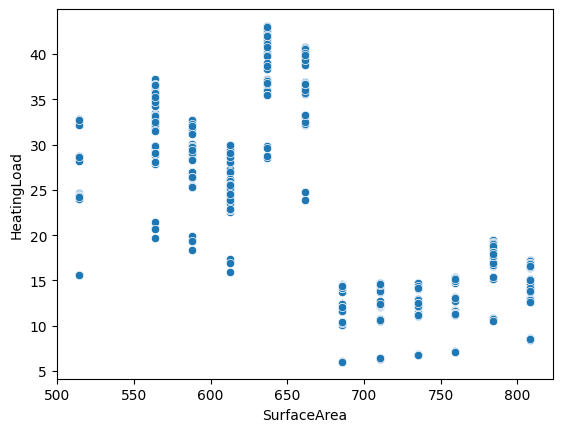

In [8]:
sns.scatterplot(data=df, x="SurfaceArea", y="HeatingLoad")

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

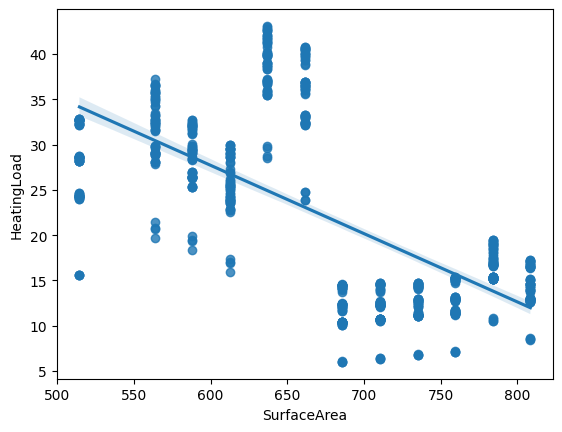

In [9]:
sns.regplot(data = df, x="SurfaceArea", y="HeatingLoad")

### 2. Is there a correlation between SurfaceArea and HeatingLoad? If so, what is the strength of it and is it statistically significant?

    don't you have to train it first to measure it's strength and to tell if it is statistically significant?
    We first train in question 4? 
    You just want an answer based on observation?

In [10]:
df[["SurfaceArea", "HeatingLoad"]]

,SurfaceArea,HeatingLoad
0,514.5,15.55
1,514.5,15.55
2,514.5,15.55
3,514.5,15.55
4,563.5,20.84
...,...,...
763,784.0,17.88
764,808.5,16.54
765,808.5,16.44
766,808.5,16.48


    There seems to be one, but it is hard to say for sure

    There seems to be two clusters that each has a small tendency to go up in HeatingLoad as SurfaceArea increases, but making a generalization of it all makes it give a clear negative coeficient because the first cluster is higher then the second

### 3. Does the correlation make sense to you? What if you add hue = "OverallHeight" to your scatterplot?

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

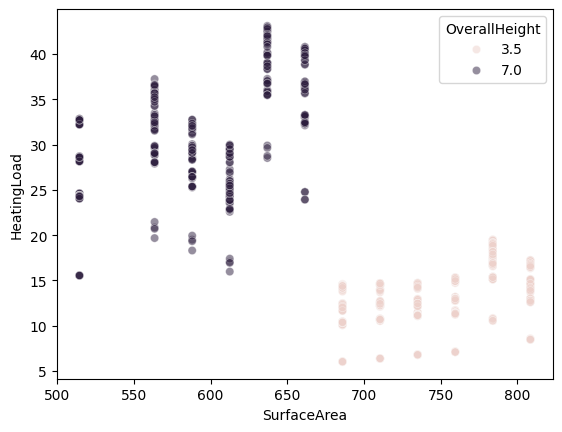

In [11]:
sns.scatterplot(data=df, x="SurfaceArea", y="HeatingLoad", hue="OverallHeight", alpha=0.5)

    Given this information it doesn't make sense as there seems to be to different clusters of data. Not sure what to make of it

### 4. Train a simple linear regression model with SurfaceArea as independent variable (x) and HeatingLoad as dependent variable (y).

In [12]:
X = df["SurfaceArea"]
y = df["HeatingLoad"]

In [13]:
X = sm.add_constant(X)

In [14]:
X

,const,SurfaceArea
0,1.0,514.5
1,1.0,514.5
2,1.0,514.5
3,1.0,514.5
4,1.0,563.5
...,...,...
763,1.0,784.0
764,1.0,808.5
765,1.0,808.5
766,1.0,808.5


In [15]:
linreg_model = sm.OLS(y, X).fit()

In [16]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.69e-96
Time:                        21:04:18   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation of the model**

Here we see general information about the model at the top, such as R-squared (0.433) and  Adjusted R-squared (0.432)
The coef for SurfaceArea is -0.0754 for the slope indicating it is negative and not to step.
The pvalue is aproximately 0 meaning that the hypothesis can be rejected and that there is a correlation


### 5. What does the model say about the change HeatingLoad when the SurfaceArea goes up by 1 unit?

When going one unit up on the SurfaceArea(x) axes, the correlated HeatingLoad(y) axis changes by -0.0754

### 6. Add the linear regression line to a scatterplot of SurfaceArea and HeatingLoad

In [17]:
pred_y = linreg_model.params["const"] + linreg_model.params["SurfaceArea"]*df["SurfaceArea"]

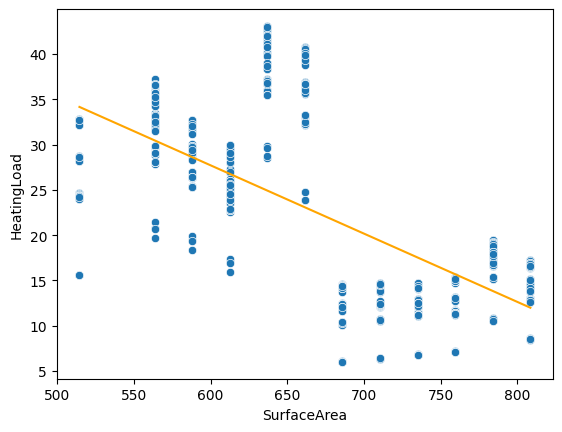

In [18]:
sns.scatterplot(df, x="SurfaceArea", y="HeatingLoad")
plt.plot(df["SurfaceArea"], pred_y, color="orange")
plt.show()

### 7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [40]:
# R-squared, with the value 0.433 it tells that it might not be a good fit given it is numerical data of houses, closer to 1 the better
print("rsquared:     ", linreg_model.rsquared)
print("rsquared_adj: ", linreg_model.rsquared_adj) # Adj. R-squared
print("residual:     ", linreg_model.resid)

print("\nMAE:        ", np.mean(np.abs(linreg_model.resid))) # MAE
print("MSE:          ", np.mean(linreg_model.resid**2)) #MSE
print("RMSE:         ", np.sqrt(np.mean(linreg_model.resid**2))) # RMSE

rsquared:      0.43312223289382823
rsquared_adj:  0.4323821835895121
residual:      0     -18.608690
1     -18.608690
2     -18.608690
3     -18.608690
4      -9.624719
         ...    
763     4.038149
764     4.545134
765     4.445134
766     4.485134
767     4.645134
Length: 768, dtype: float64

MAE:         6.002338517195692
MSE:           57.63983779426343
RMSE:          7.592090475900786


    Given the measures from RMSE and the interval of the HeatingLoad, the error seems to be quite big in comparison
    This is not a good model as there is different heights for the buildings and should be categorised or include more categorise for a general prediction model

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.


### 1. Train a multiple linear regression model for HeatingLoad using at least two other variables from the dataset as feature variables.

In [26]:
X_multi = df[["SurfaceArea", "RelativeCompactness", "GlazingArea"]]
X_multi

,SurfaceArea,RelativeCompactness,GlazingArea
0,514.5,0.98,0.0
1,514.5,0.98,0.0
2,514.5,0.98,0.0
3,514.5,0.98,0.0
4,563.5,0.90,0.0
...,...,...,...
763,784.0,0.64,0.4
764,808.5,0.62,0.4
765,808.5,0.62,0.4
766,808.5,0.62,0.4


In [27]:
y_multi = df["HeatingLoad"]
y_multi

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: HeatingLoad, Length: 768, dtype: float64

In [ ]:
X_multi_wInt = sm.add_constant(X_multi)

In [ ]:
mulinreg_model = sm.OLS(y_multi, X_multi_wInt).fit()

In [30]:
mulinreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     329.0
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          4.25e-137
Time:                        21:04:19   Log-Likelihood:                -2546.1
No. Observations:                 768   AIC:                             5100.
Df Residuals:                     764   BIC:                             5119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 350.4465     28.140     12.454      0.000     295.205     405.688
SurfaceArea            -0.2903      0.022    -13.471      0.000      -0.333      -0.248
RelativeCompactness  -180.4643     17.949    -10.055      0.000    -215.699    -145.230
GlazingArea            20.4379      1.810     11.291      0.000      16.885      23.991
==============================================================================
Omnibus:                      117.214   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.508
Skew:                           0.112   Prob(JB):                     3.91e-07
Kurtosis:                       2.066   Cond. No.                     9.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
mulinreg_model.params

const                  350.446471
SurfaceArea             -0.290341
RelativeCompactness   -180.464308
GlazingArea             20.437899
dtype: float64

### 2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?

In [32]:
print("linear R-squared:       ", linreg_model.rsquared)
print("multi linear R-squared: ", mulinreg_model.rsquared)

print("\nlinear RMSE:       ", np.sqrt(np.mean(linreg_model.resid**2))) # RMSE
print("multi linear RMSE: ", root_mean_squared_error(y_multi, pred_y)) # RMSE

linear R-squared:        0.43312223289382823
multi linear R-squared:  0.5636720852099284

linear RMSE:        7.592090475900786
multi linear RMSE:  7.592090475900786


    Given that R-squared for the multi linear is greater by 0.13 and that it's RMSE is smaller by 0.9, indicating less error,
    it is fair to say the multi linear is a better model to predict HeatLoad

### 3. Check each of the assumptions/problems for linear regression.

### Non-linearity of the data

One of the assumptions of linear regression is that there is a linear relationship between the independent (X) variables and the dependent variable (y). 

For simple linear regression, we can make a scatterplot of the x and y variable and visually inspect for linear relationship. However, for multiple linear regression, we cannot do that. Instead, we can plot the residuals versus the predicted values:

In [33]:
pred_y = mulinreg_model.predict()

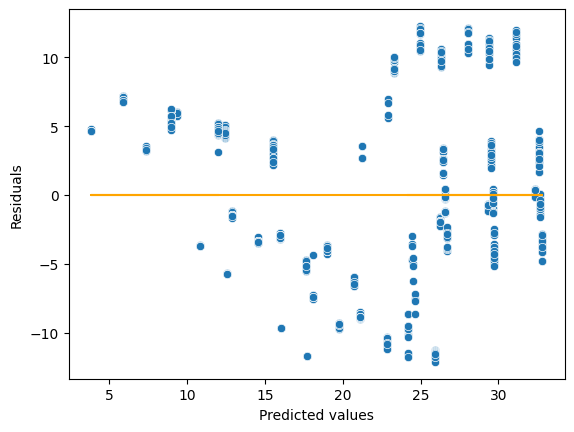

In [34]:
sns.scatterplot(x = pred_y, y = mulinreg_model.resid)
plt.plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

    Seems to be a pattern, bit like a v, first above the line, then below, than above again, not random
    Not sure what to make of this, is it linear? I would say no

### Correlation of error terms 

Another assumption of linear regression is that the error terms are uncorrelated, in other words, the i'th error term $e_i$ does not tell us anything about i+1'th error term $e_{i+1}$. Thus, to investigate this, we can plot the residuals in order of their appearance (or by time, if there is a time variable). As we have no time variable, we can instead plot the residuals versus their row number.

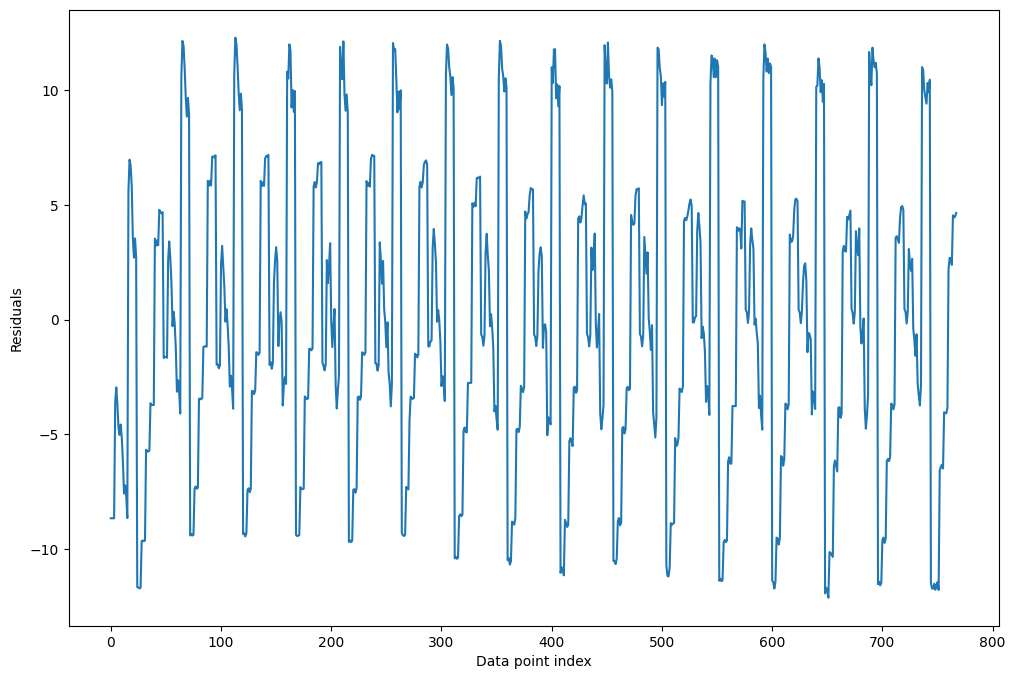

In [35]:
plt.rc("figure", figsize=(12, 8))
sns.lineplot(x = range(0, len(mulinreg_model.resid)), y = mulinreg_model.resid)
plt.ylabel("Residuals")
plt.xlabel("Data point index")
plt.show()

    Here there seems to be a very clear repeating pattern, with a little bit of variation

### Non-constant variance of error terms

Another assumption of linear regression is that the error terms have constant variance. One common way of seeing non-constant error terms it to look at the plot of residuals versus predicted values a look whether the variance increase as the predicted values do - it will look like a funnel. So let us look at this plot again:

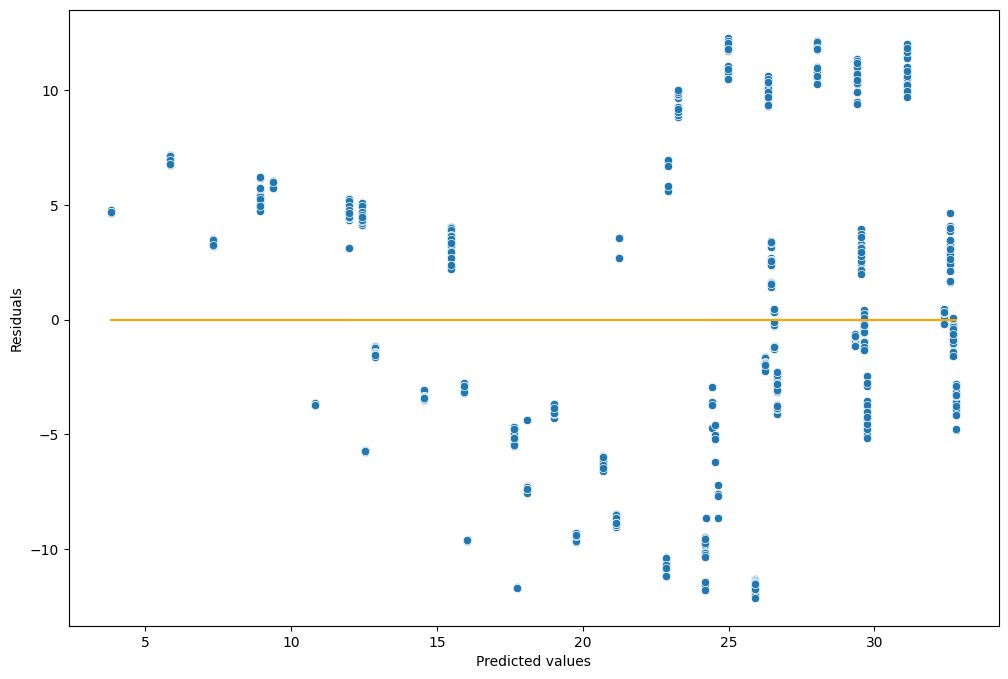

In [36]:
sns.scatterplot(x = pred_y, y = mulinreg_model.resid)
plt.plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

    This just seems like a small part of the repeating pattern, would not seem to be a clear funnel, just for ever ops and downs of points

### Outliers

Outliers in regard to linear regression models, are points for which the predicted value is very far from the actual values. These we can also spot in the residual vs predicted values plot. So let us not make the plot again, but just look at the plot above.

No outliers from the pattern

### High leverage points

High leverage points are a bit like residuals. They are point that as a high influence on how the model looks. In simple linear regression, this means that a high leverage point might heavily affect where the regression line lies. Note that outliers are extreme values in a sense, but they do not need to have high leverage as they might not affect the actual model fit that much.

High leverage points are usually points that have an x-value far away from the other x-values in the dataset. This is easy to spot in simple linear regression where we only have on x variable. However, it is much harder to spot directly for multiple linear regression. Luckily, there is a leverage statistics we can calculate for each point based on a linear regression model, which we can use to make a "Leverage plot".

In [37]:
leverageStats = mulinreg_model.get_influence().hat_matrix_diag
leverageStats

array([0.01539043, 0.01539043, 0.01539043, 0.01539043, 0.00765332,
       0.00765332, 0.00765332, 0.00765332, 0.00662323, 0.00662323,
       0.00662323, 0.00662323, 0.00748546, 0.00748546, 0.00748546,
       0.00748546, 0.00727719, 0.00727719, 0.00727719, 0.00727719,
       0.00728029, 0.00728029, 0.00728029, 0.00728029, 0.00574041,
       0.00574041, 0.00574041, 0.00574041, 0.00604815, 0.00604815,
       0.00604815, 0.00604815, 0.00602134, 0.00602134, 0.00602134,
       0.00602134, 0.00663372, 0.00663372, 0.00663372, 0.00663372,
       0.00811998, 0.00811998, 0.00811998, 0.00811998, 0.01102607,
       0.01102607, 0.01102607, 0.01102607, 0.01268153, 0.01268153,
       0.01268153, 0.01268153, 0.00494441, 0.00494441, 0.00494441,
       0.00494441, 0.00391432, 0.00391432, 0.00391432, 0.00391432,
       0.00477655, 0.00477655, 0.00477655, 0.00477655, 0.00456828,
       0.00456828, 0.00456828, 0.00456828, 0.00457139, 0.00457139,
       0.00457139, 0.00457139, 0.0030315 , 0.0030315 , 0.00303

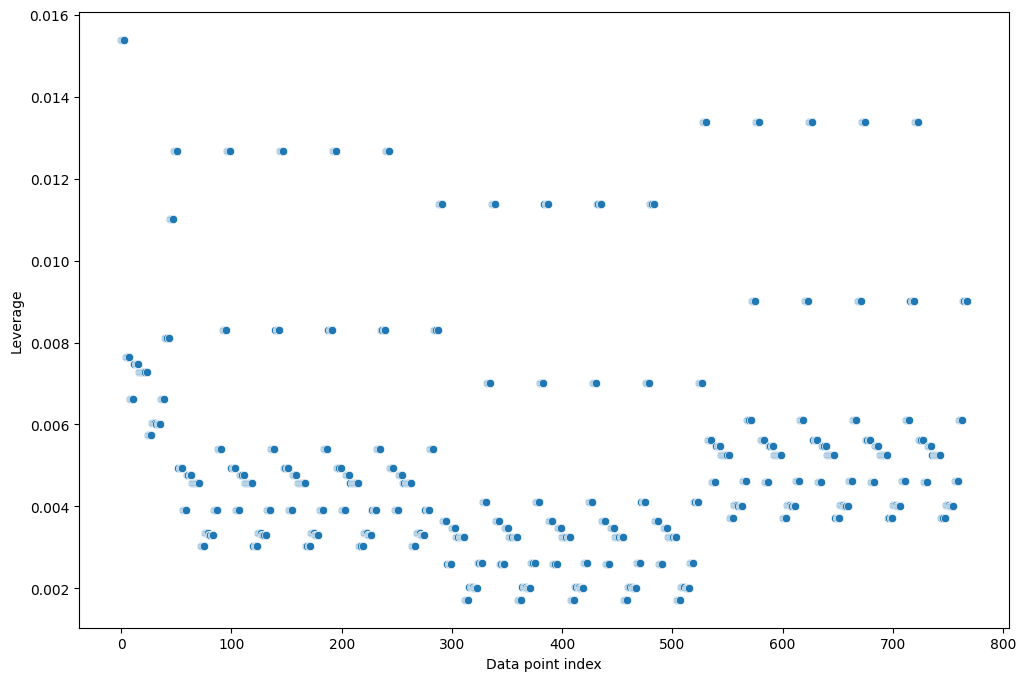

In [38]:
plt.rc("figure", figsize=(12, 8))
sns.scatterplot(x = range(0, len(leverageStats)), y = leverageStats)
plt.ylabel("Leverage")
plt.xlabel("Data point index")
plt.show()

    Again this is a repeating pattern, no big leverage points like you would expect, there are plenty of repeating big residual values that lies at around -10 and 10
    From the plot there is one a few points at around (0, 0.015) that are quite far away from the other points and alone

### Collinearity

Collinearity can also be a problem for linear regression models and refers to the existence of high correlation between two or more of the independent/predictor variables. IF two predictor variables are highly correlated, it can be hard/impossible for a linear regression model to separate out the effect on the response variable, coming from each of them - one might have a really high positive effect, while the other might have a really high negative effect, but in reality neither of them might have a big impact on the response variable.

The easiest way to spot collinearity between any pair of variables is to look at the correlation matrix:

In [39]:
X_multi_wInt.corr()

,const,SurfaceArea,RelativeCompactness,GlazingArea
const,NaN,NaN,NaN,NaN
SurfaceArea,NaN,1.000000e+00,-9.919015e-01,3.636925e-15
RelativeCompactness,NaN,-9.919015e-01,1.000000e+00,-2.960552e-15
GlazingArea,NaN,3.636925e-15,-2.960552e-15,1.000000e+00


    most correlation values are very close to 0, meaning they have no strong correlation, but SurfaceArea and RelativeCompactness as a value of -0.991 which indicates a strong negative correlation
    Compactness and the surface are of course related as you would understand if the surface area increased a certain amount unit^2 volume would then increase unit^3 